In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.option_context('mode.use_inf_as_na', True)
import warnings
warnings.filterwarnings('ignore')

In [44]:
df  = pd.read_csv('wine_data.csv',header = None,usecols = [0,1,2])

In [45]:
df.columns= ['class_label','alcohol','malic_acid']

In [46]:
df.head()

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

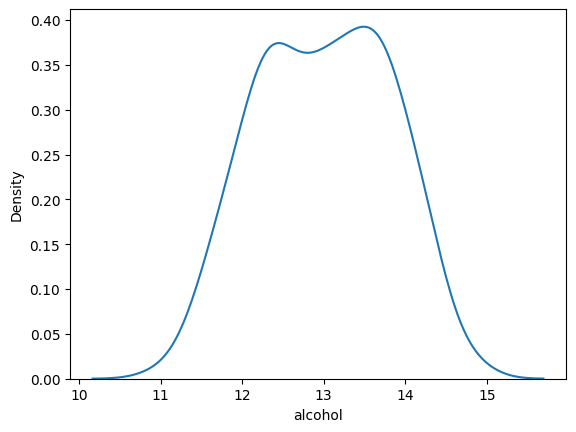

In [47]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic_acid', ylabel='Density'>

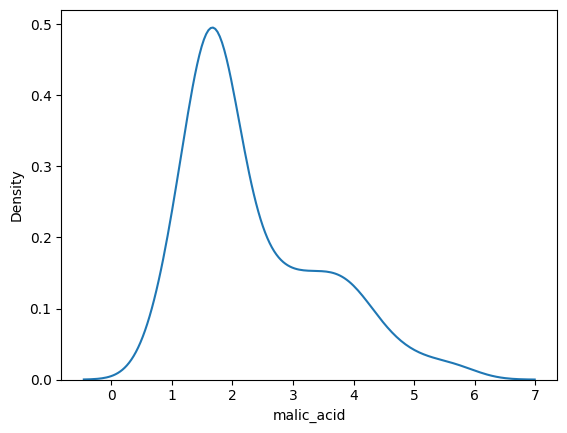

In [48]:
sns.kdeplot(df['malic_acid'])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

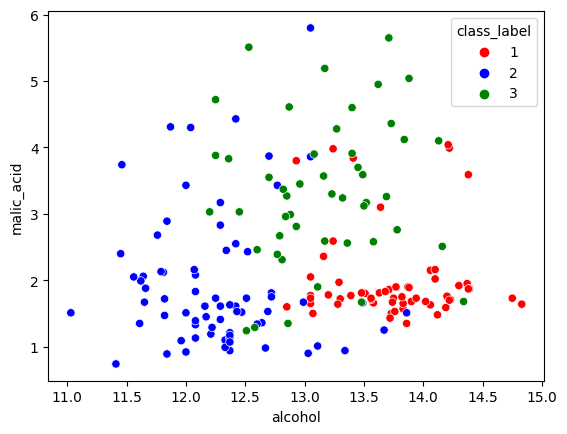

In [49]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(x = df['alcohol'],y=df['malic_acid'],hue = df['class_label'],palette = color_dict)

# train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('class_label',axis = 1),
                                                df['class_label'],
                                                test_size = 0.3,
                                                random_state = 0)

print(x_train.shape,x_test.shape)

(124, 2) (54, 2)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

# fit the scaler to the train set it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns  = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns  = x_test.columns)

In [53]:
np.round(x_train.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [54]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


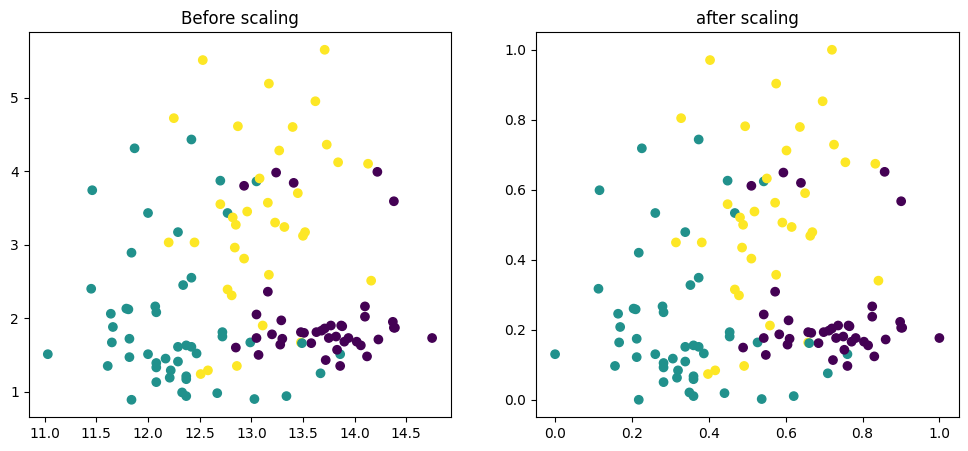

In [55]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(x_train['alcohol'],x_train['malic_acid'], c = y_train)
ax1.set_title('Before scaling')

ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic_acid'],c = y_train)
ax2.set_title('after scaling')
plt.show()

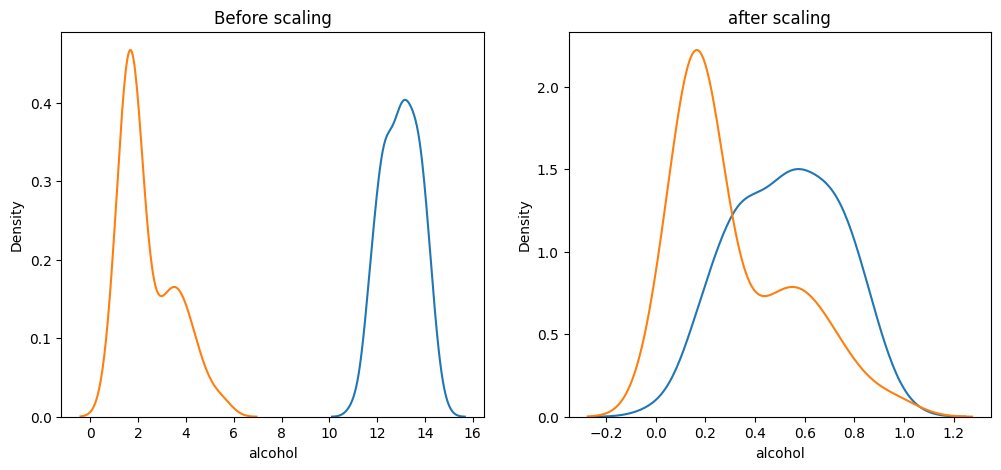

In [56]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling

ax1.set_title('Before scaling')
sns.kdeplot(x_train['alcohol'],ax = ax1)
sns.kdeplot(x_train['malic_acid'],ax = ax1)
# after sclaing
sns.kdeplot(x_train_scaled['alcohol'],ax = ax2)
sns.kdeplot(x_train_scaled['malic_acid'],ax = ax2)
ax2.set_title('after scaling')
plt.show()

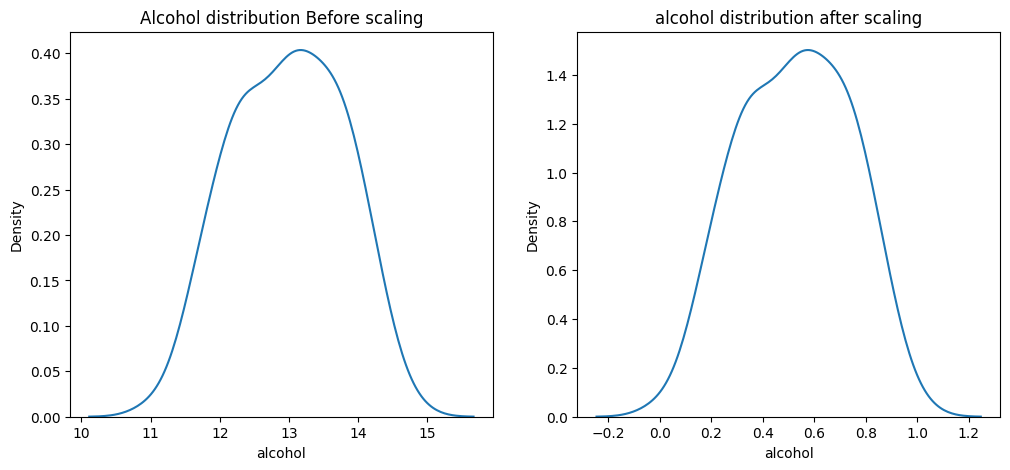

In [57]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling

ax1.set_title('Alcohol distribution Before scaling')
sns.kdeplot(x_train['alcohol'],ax = ax1)
# after sclaing
sns.kdeplot(x_train_scaled['alcohol'],ax = ax2)
ax2.set_title('alcohol distribution after scaling')
plt.show()

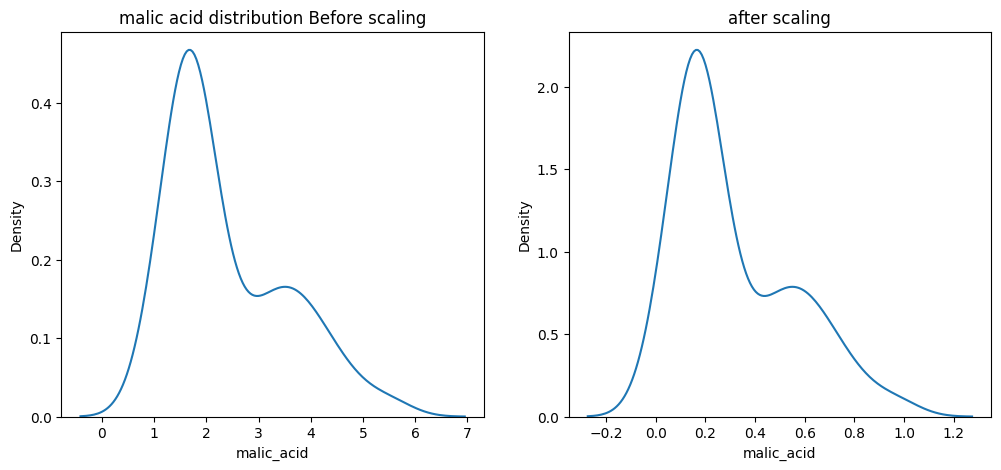

In [58]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling

ax1.set_title('malic acid distribution Before scaling')
sns.kdeplot(x_train['malic_acid'],ax = ax1)
# after sclaing

sns.kdeplot(x_train_scaled['malic_acid'],ax = ax2)
ax2.set_title('after scaling')
plt.show()